In [ ]:
# Imports
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import datetime

# Plotly
#import chart_studio.plotly as py
import plotly.express as px
import plotly.graph_objects as go
import colorlover as cl
from plotly.subplots import make_subplots


#Download the Data
#!pip install gdown
import gdown
files = {"continents2.csv": "https://drive.google.com/uc?export=download&id=1EaXdz5cmaZP-NxuyDNmOidKxFKY_FTIb",
         "GlobalTemperatures.csv": "https://drive.google.com/uc?id=1TOL3JDm75YfVAO9LkzCuCNvSonh2hi1_",
         "GlobalLandTemperaturesByState.csv": "https://drive.google.com/uc?id=1OvgM2Hz512x7JCgloZXr3BwQviAO0X0O",
         "GlobalLandTemperaturesByCountry.csv": "https://drive.google.com/uc?id=1A5ptCQlqJz4sQ2Y6WW2BchGMsrUKuHtW",
         #"GlobalLandTemperaturesByCity.csv": "https://drive.google.com/uc?id=17CV_8aVscRlscgtxVbk19I4hz0VjLdfS", 
         "cities.csv": "https://drive.google.com/uc?id=1W9VDIDuj60nMc2rD43KgbJCZlNnDCsOp", 
         "region.csv": "https://drive.google.com/uc?id=1WiO1OykbEnyQj4PJZP5943fdmtsfnpja", 
         "countries.csv": "https://drive.google.com/uc?id=1Z7LKYwEzDotiICO136Z8Wg4yT9_KWiFF"}
for file in files:
  gdown.download(files[file], file, quiet=True)

In [ ]:
körpergrößen = [165, 175, 187, 178, 166, 182, 172, 174, 192, 169, 177, 180, 167, 185, 228]

In [ ]:
print("Der kleinste Wert ist: ", np.min(körpergrößen))

Der kleinste Wert ist:  165


In [ ]:
print("Der größte Wert ist: ", np.max(körpergrößen))

Der größte Wert ist:  228


In [ ]:
np.mean(körpergrößen)

179.8

In [ ]:
np.median(körpergrößen)

177.0

In [ ]:
# Data wird gelesen
global_temperatures = pd.read_csv("GlobalTemperatures.csv")
global_temperatures.head(-5)

,dt,LandAverageTemperature,LandAverageTemperatureUncertainty,LandMaxTemperature,LandMaxTemperatureUncertainty,LandMinTemperature,LandMinTemperatureUncertainty,LandAndOceanAverageTemperature,LandAndOceanAverageTemperatureUncertainty
0,1750-01-01,3.034,3.574,NaN,NaN,NaN,NaN,NaN,NaN
1,1750-02-01,3.083,3.702,NaN,NaN,NaN,NaN,NaN,NaN
2,1750-03-01,5.626,3.076,NaN,NaN,NaN,NaN,NaN,NaN
3,1750-04-01,8.490,2.451,NaN,NaN,NaN,NaN,NaN,NaN
4,1750-05-01,11.573,2.072,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
3182,2015-03-01,6.740,0.060,12.659,0.096,0.894,0.079,15.193,0.061
3183,2015-04-01,9.313,0.088,15.224,0.137,3.402,0.147,15.962,0.061
3184,2015-05-01,12.312,0.081,18.181,0.117,6.313,0.153,16.774,0.058
3185,2015-06-01,14.505,0.068,20.364,0.133,8.627,0.168,17.390,0.057


In [ ]:
#Zunächst müssen wir einige Vorbereitungen treffen.
global_temperatures.dropna(axis = 0, inplace = True)
global_temperatures['Date'] = pd.to_datetime(global_temperatures.dt) # converted all dates to the same format

# Nun verwenden wir die Datums Spalte als einen Index 
# So wie in einem Lexikon die einzelne Buchstaben dir das finden von Wörtern erleichtert, 
# lässt uns ein Index leichter und effizienter Ergebnisse finden
global_temperatures.set_index("Date", inplace=True)
global_temperatures.drop(columns = ['dt'], axis = 1, inplace = True) # drop the dt column

# Für zukünftige Analysen werden wir nur mit Jahresdaten als Durchschnitt arbeiten 
#(weil Daten fehlen und Daten nicht konsistent sind).
yearly_global_temperatures = global_temperatures.groupby(by = global_temperatures.index.year)[['LandAverageTemperature', 'LandAverageTemperatureUncertainty',
       'LandMaxTemperature', 'LandMaxTemperatureUncertainty',
       'LandMinTemperature', 'LandMinTemperatureUncertainty',
       'LandAndOceanAverageTemperature',
       'LandAndOceanAverageTemperatureUncertainty']].mean()

yearly_global_temperatures.head(5)

,LandAverageTemperature,LandAverageTemperatureUncertainty,LandMaxTemperature,LandMaxTemperatureUncertainty,LandMinTemperature,LandMinTemperatureUncertainty,LandAndOceanAverageTemperature,LandAndOceanAverageTemperatureUncertainty
Date,,,,,,,,
1850,7.900667,0.876417,13.476667,2.394833,1.964333,1.571167,14.867167,0.308167
1851,8.178583,0.881917,13.081000,2.397250,2.203917,1.632417,14.991833,0.312083
1852,8.100167,0.918250,13.397333,2.619250,2.337000,1.382917,15.006500,0.316417
1853,8.041833,0.835000,13.886583,2.095083,1.892500,1.355583,14.955167,0.283833
1854,8.210500,0.825667,13.977417,1.783333,1.762167,1.357000,14.991000,0.276417


In [ ]:
# Einfache zusammenfassende Statistiken
yearly_global_temperatures[['LandAverageTemperature', 'LandMaxTemperature', 
       'LandMinTemperature', 'LandAndOceanAverageTemperature']].describe()

,LandAverageTemperature,LandMaxTemperature,LandMinTemperature,LandAndOceanAverageTemperature
count,166.000000,166.000000,166.000000,166.000000
mean,8.571583,14.350601,2.743595,15.212566
std,0.473687,0.447741,0.614124,0.298629
min,7.558583,13.081000,1.525083,14.740083
25%,8.195708,14.055917,2.262562,14.991208
50%,8.540750,14.307708,2.734917,15.144208
75%,8.791250,14.539167,3.126833,15.379104
max,9.831000,15.572667,4.148833,16.058583


In [ ]:
Jahre = yearly_global_temperatures.index
temperaturen_global = yearly_global_temperatures['LandAverageTemperature']
Durchschnitt_global = np.mean(temperaturen_global)

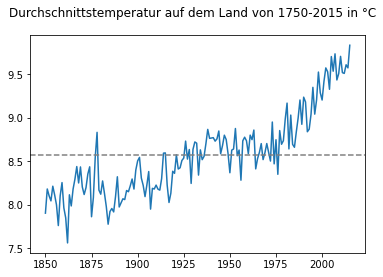

In [ ]:
# Hier erstellen wir den Plot
plt.plot(Jahre, temperaturen_global)
plt.suptitle("Durchschnittstemperatur auf dem Land von 1750-2015 in °C")
plt.axhline(Durchschnitt_global, linestyle="--", color="grey")
# Um den Plot anzeigen zu lassen, verwenden wir plt.show()
plt.show()

In [ ]:
countries = pd.read_csv('countries.csv')
region = pd.read_csv("region.csv")
cities = pd.read_csv("cities.csv")

In [ ]:
countries.head()

,region,Country,year,AverageTemperature,AverageTemperatureUncertainty
0,Africa,Algeria,1825,17.642750,2.168750
1,Africa,Algeria,1826,17.461233,2.140183
2,Africa,Algeria,1827,17.456433,2.193283
3,Africa,Algeria,1828,17.902917,2.200283
4,Africa,Algeria,1829,17.311133,2.390317


In [ ]:
def pad(x):
  n = Jahre.shape[0]
  k = x.shape[0]
  ret = np.zeros(n)
  ret[n-k:] = x
  return ret

In [ ]:
#In Europa interessieren wir uns für die Länder Deutschland, Österreich, Schweiz und Italien
Jahre       = countries[countries['Country'] == 'Germany']['year']
Deutschland = countries[countries['Country'] == 'Germany']['AverageTemperature']
Österreich  = countries[countries['Country'] == 'Austria']['AverageTemperature']
Schweiz     = countries[countries['Country'] == 'Switzerland']['AverageTemperature']
Italien     = countries[countries['Country'] == 'Italy']['AverageTemperature']

#Außerhalb Europas für die USA, Ghana und Australien
USA            = countries[countries['Country'] == 'United States']['AverageTemperature']
Ghana          = countries[countries['Country'] == 'Ghana']['AverageTemperature']
Ghana          = pad(Ghana)
Australien     = countries[countries['Country'] == 'Australia']['AverageTemperature']

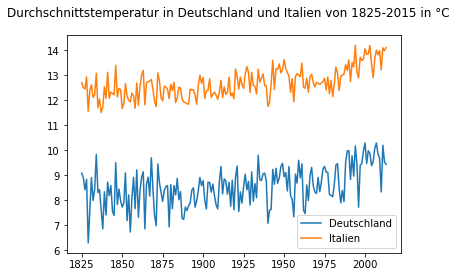

In [ ]:
#Wir fügen zu beiden Zeitreihen ein Label hinzu
plt.plot(Jahre, Deutschland, label="Deutschland")
plt.plot(Jahre, Italien, label="Italien")
### Dein Code hier
plt.suptitle("Durchschnittstemperatur in Deutschland und Italien von 1825-2015 in °C")
plt.legend()
plt.show()

In [ ]:
Deutschland_Durchschnitt = np.mean(Deutschland)

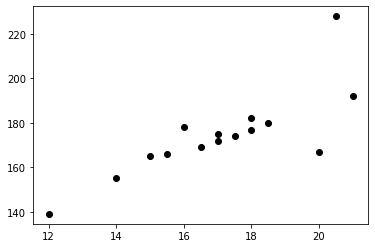

In [ ]:
körpergrößen = [165, 175, 139, 178, 166, 182, 172, 174, 192, 169, 177, 180, 167, 155, 228]
alter = [15, 17, 12, 16, 15.5, 18, 17, 17.5, 21, 16.5, 18, 18.5, 20, 14, 20.5]


plt.scatter(alter, körpergrößen, color="black")

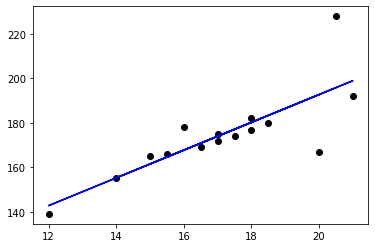

In [ ]:
from sklearn.linear_model import LinearRegression
alter = np.reshape(alter, (-1, 1))

# 1) Definiere die X 
X = alter
y = körpergrößen

# 2) Erstelle das lineare Model Object (aus der importierten library)
reg = LinearRegression()

# 3) Lasse das Model die Rechnungen ausführen, um das Model zu erstellen
reg.fit(X, y)

# 4) Berechne Vorhersagewerte anhand des Models 
model = reg.predict(alter)

# originale Messwerte in einem "Scatterplot"
plt.scatter(X, y, color='k', label="Messwerte")

# berechnete Gerade der linearen Regression
plt.plot(X, model, color='b', label="Lineares Model")

plt.show()